## Optimization with Gradient Descent

### Gradient Descient

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import seaborn as sns
sns.set()

#### Example 1: Sphere

Spherical Surface : $F(x,y) = x^{2} + y^{2}$

In [2]:
def sphere(x):
    return x[0]**2 + x[1]**2

def df_sphere(x):
    return np.array([2.0*x[0], 2.0*x[1]])

- Plot surface

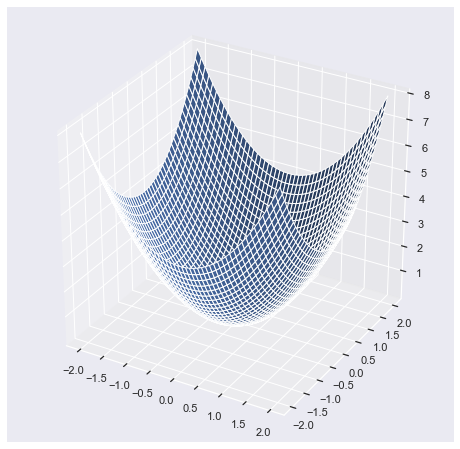

In [3]:
fig = pt.figure(figsize = [8,8])
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = sphere(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

- Plot Concors

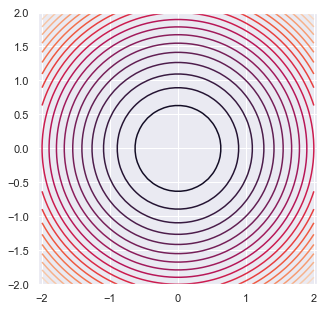

In [4]:
pt.figure( figsize = [5,5])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh,20)

- Find Minimum

In [5]:
guesses = [np.array([2,2])]
for i in range(10000):
    x = guesses[-1]
    s = -df_sphere(x)
    alpha = 0.001

    next_guess = x + alpha * s
    guesses.append(next_guess)

In [6]:
guesses[0:10]

[array([2, 2]),
 array([1.996, 1.996]),
 array([1.992008, 1.992008]),
 array([1.98802398, 1.98802398]),
 array([1.98404794, 1.98404794]),
 array([1.98007984, 1.98007984]),
 array([1.97611968, 1.97611968]),
 array([1.97216744, 1.97216744]),
 array([1.96822311, 1.96822311]),
 array([1.96428666, 1.96428666])]

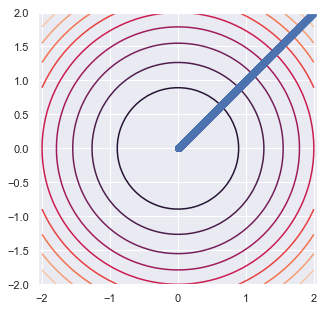

In [7]:
pt.figure( figsize = [5,5])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 10)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "o")

#### Example 2: Abritrary Surface [source](https://en.wikipedia.org/wiki/Gradient_descent)

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/1ffee4fb42387d27e4a1e4d37d28239ff3b672fb)

In [8]:
def surface(x):
    return np.sin(0.5*x[0]**2 -0.25*x[1]**2 + 3)*np.cos(2.0*x[0] + 1.0 + np.exp(x[1]))

def df_surface(x):
    
    u = np.sin(0.5*x[0]**2 -0.25*x[1]**2 + 3)
    u_x = np.cos(0.5*x[0]**2 -0.25*x[1]**2 + 3)*x[0]
    u_y = -np.cos(0.5*x[0]**2 -0.25*x[1]**2 + 3)*0.5*x[1]
                                                     
    v = np.cos(2.0*x[0] + 1.0 + np.exp(x[1]))
    v_x = -np.sin(2.0*x[0] + 1.0 + np.exp(x[1]))*2.0
    v_y = np.sin(2.0*x[0] + 1.0 + np.exp(x[1]))*np.exp(x[1])                                              
    
    df_x = u_x*v + u*v_x
    df_y = u_y*v + u*v_y
                                                     
    return np.array([df_x,df_y])

- Plot Surface

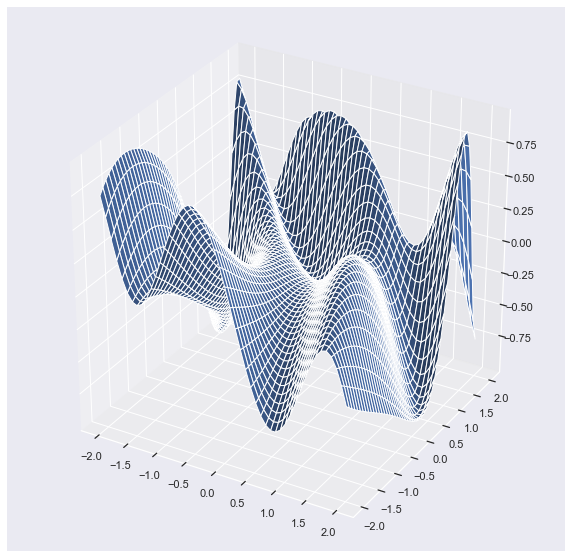

In [9]:
fig = pt.figure(figsize = [10,10])
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = surface(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

- Plot Contor

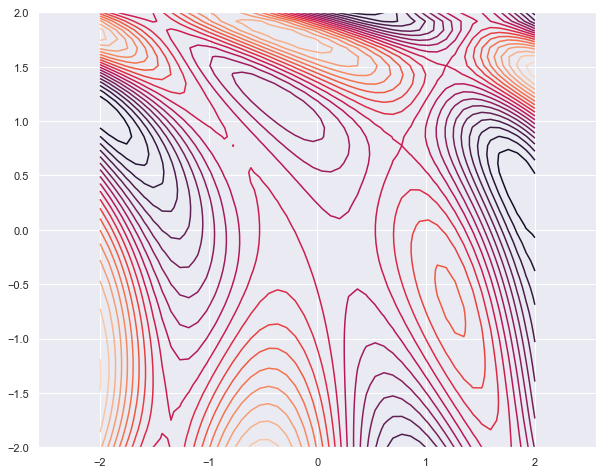

In [14]:
pt.figure( figsize = [10,8])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh,20)

- Find minimum

In [15]:
guesses = [np.array([-0.25,0.5])]
for i in range(100000):
    x = guesses[-1]
    s = -df_surface(x)
    alpha = 0.0001

    next_guess = x + alpha * s
    guesses.append(next_guess)

In [16]:
guesses[0:10]

[array([-0.25,  0.5 ]),
 array([-0.24995774,  0.4999897 ]),
 array([-0.24991547,  0.49997941]),
 array([-0.24987321,  0.49996911]),
 array([-0.24983095,  0.49995882]),
 array([-0.24978869,  0.49994853]),
 array([-0.24974643,  0.49993824]),
 array([-0.24970417,  0.49992795]),
 array([-0.24966191,  0.49991766]),
 array([-0.24961965,  0.49990738])]

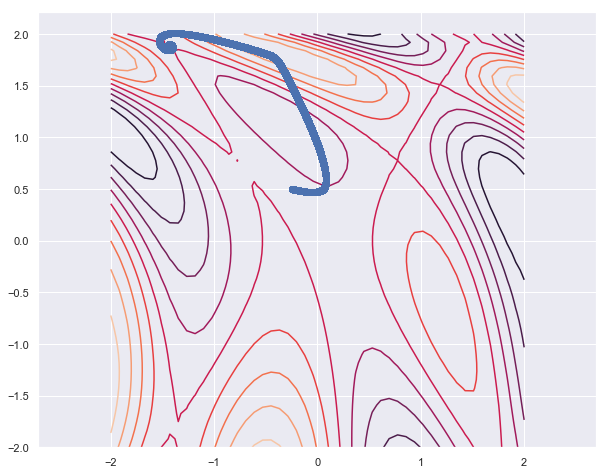

In [17]:
pt.figure( figsize = [10,8])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 10)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "o")

### References

1. https://andreask.cs.illinois.edu/cs357-s15/public/demos/12-optimization/Steepest%20Descent.html
2. https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html
3. https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
4. https://scipy-cookbook.readthedocs.io/index.html
5. http://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html